In [251]:
#from google.colab import files
#uploaded = files.upload()

In [252]:
!ls


insurance.csv  sample_data


In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# read the csv file
data = pd.read_csv('insurance.csv').to_numpy()
data

array([[   18, 10000],
       [   22, 15000],
       [   23, 18000],
       [   26, 21000],
       [   28, 24000],
       [   31, 26500],
       [   33, 27000],
       [   35, 30000],
       [   37, 33000],
       [   40, 37000]])

In [254]:
X = data[:,0].reshape(-1,1)   #reshape to making N * D
Y = data[:,1]

In [255]:
X

array([[18],
       [22],
       [23],
       [26],
       [28],
       [31],
       [33],
       [35],
       [37],
       [40]])

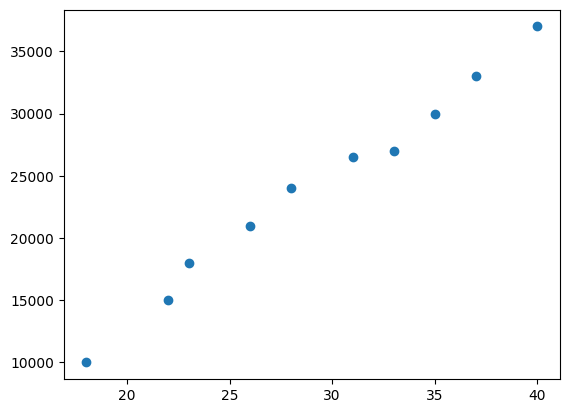

In [256]:
plt.scatter(X, Y)
plt.show()

In [257]:
#Standardize your features (optional but recommended):
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.67320212],
       [-1.08091819],
       [-0.9328472 ],
       [-0.48863425],
       [-0.19249228],
       [ 0.25172067],
       [ 0.54786264],
       [ 0.84400461],
       [ 1.14014658],
       [ 1.58435953]])

In [258]:
#Split your data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [259]:
#Create a linear regression model using TensorFlow:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer with one feature
    tf.keras.layers.Dense(1)  # Output layer with one neuron for linear regression
])

# Compile the model
model.compile(optimizer='SGD', loss='mean_squared_error')  # You can choose a different optimizer and loss function if needed



#model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.0001))


#optimizer
#'Adagrad', 'Adam', 'Ftrl', 'RMSProp', 'SGD'

In [260]:
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [261]:
#Train the linear regression model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 484ms/step - loss: 642633984.0000 - val_loss: 630959872.0000
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 617454848.0000 - val_loss: 605977984.0000
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 593264320.0000 - val_loss: 581980672.0000
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 570023424.0000 - val_loss: 558929216.0000
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 547694912.0000 - val_loss: 536786432.0000
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 526242880.0000 - val_loss: 515516576.0000
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 505632960.0000 - val_loss: 495085344.0000
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 485832192.0000 - val_loss: 475459776.0000
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 466808640.0000 

In [262]:
#Evaluate the model:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

1/1 [==============================] - 0s 26ms/step - loss: 10790633.0000
Test Loss: 10790633.0


In [263]:
X_test

array([[ 1.14014658],
       [-1.08091819]])

In [264]:
#Make predictions using the trained model:
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 48ms/step


array([[28478.135],
       [13935.105]], dtype=float32)

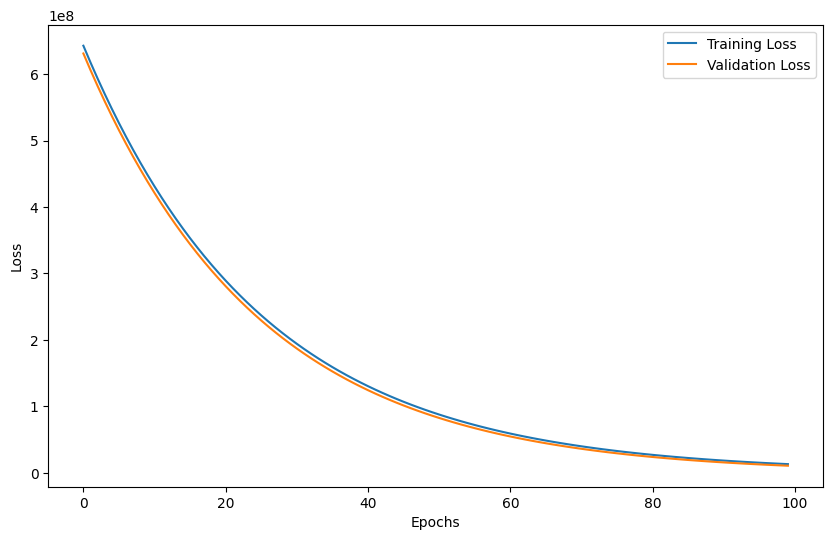

In [265]:
# Visualize the training process
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

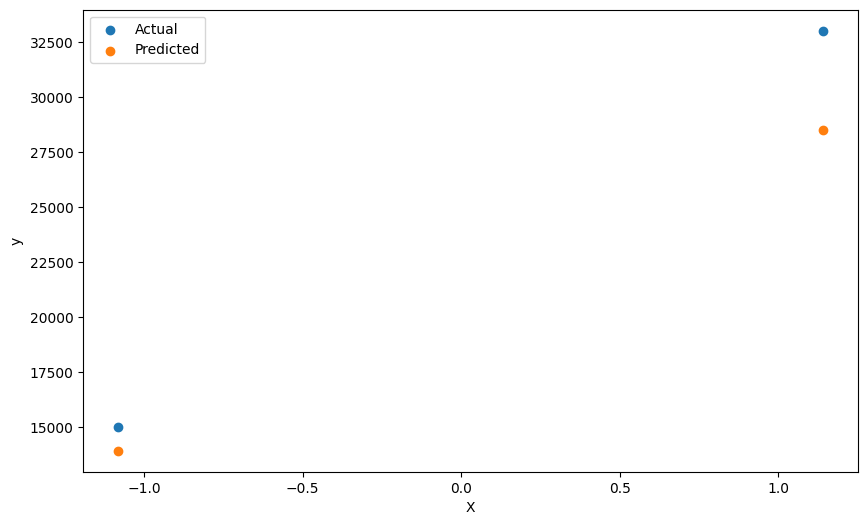

In [266]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predictions, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
